In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [3]:
df= pd.read_csv("../input/flight-price-prediction/Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df1=df.drop(['flight','Unnamed: 0'],axis=1)
#df.drop(['arrival_time'],axis=1)
df1.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:



df1['duration'] = df1['duration'].astype(str)

# make the new columns using string indexing
df1['Du_hour'] = df1['duration'].str[0:1]
df1['Du_min'] = df1['duration'].str[2:4]

# get rid of the extra variable (if you want)
df1.drop('duration', axis=1, inplace=True)
df1.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,Du_hour,Du_min
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953,2,17
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953,2,33
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956,2,17
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955,2,25
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955,2,33


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['airline'] = encoder.fit_transform(df1['airline'])
df1['source_city'] = encoder.fit_transform(df1['source_city'])
df1['departure_time'] = encoder.fit_transform(df1['departure_time'])
df1['stops'] = encoder.fit_transform(df1['stops'])
df1['arrival_time'] = encoder.fit_transform(df1['arrival_time'])
df1['destination_city'] = encoder.fit_transform(df1['destination_city'])
df1['class'] = encoder.fit_transform(df1['class'])


In [8]:
df1.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,Du_hour,Du_min
0,4,2,2,2,5,5,1,1,5953,2,17
1,4,2,1,2,4,5,1,1,5953,2,33
2,0,2,1,2,1,5,1,1,5956,2,17
3,5,2,4,2,0,5,1,1,5955,2,25
4,5,2,4,2,4,5,1,1,5955,2,33


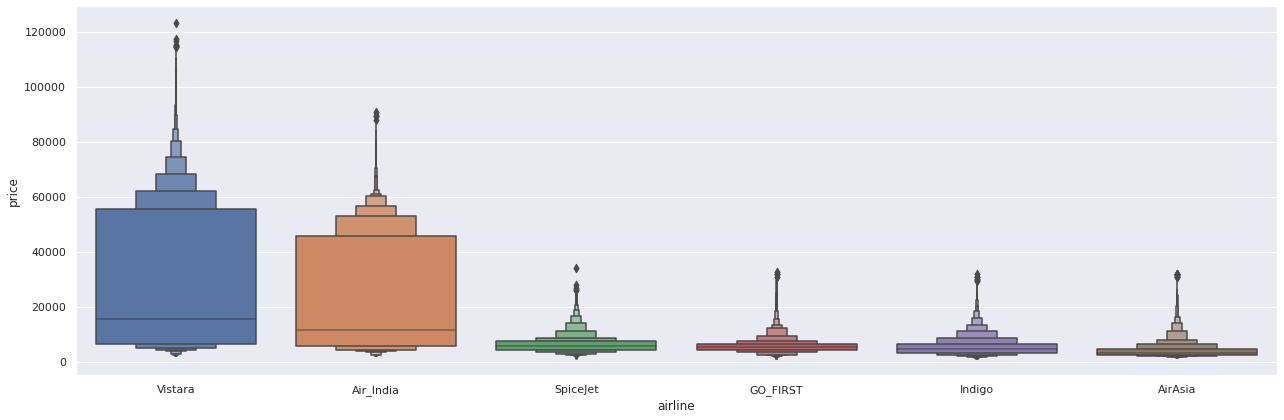

In [9]:
sns.catplot(y = "price", x = "airline", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

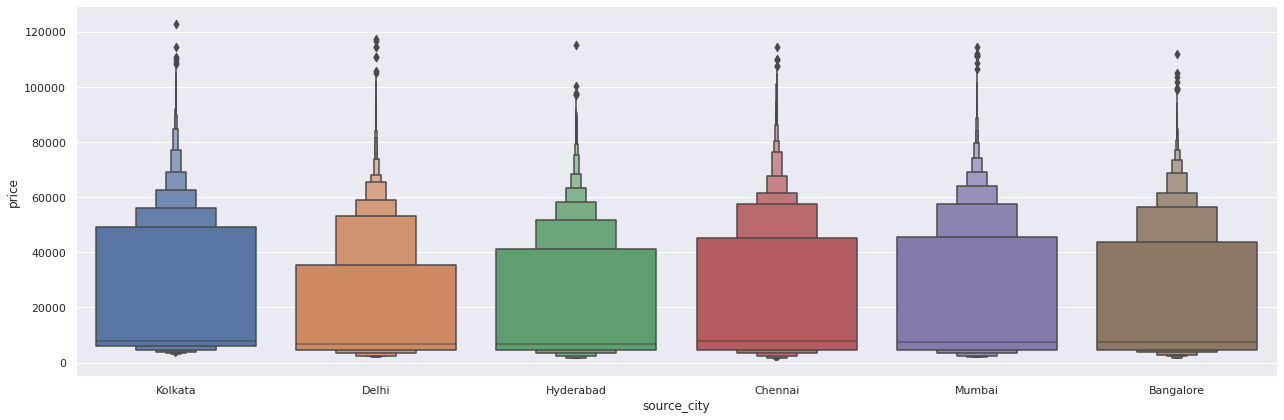

In [10]:
sns.catplot(y = "price", x = "source_city", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

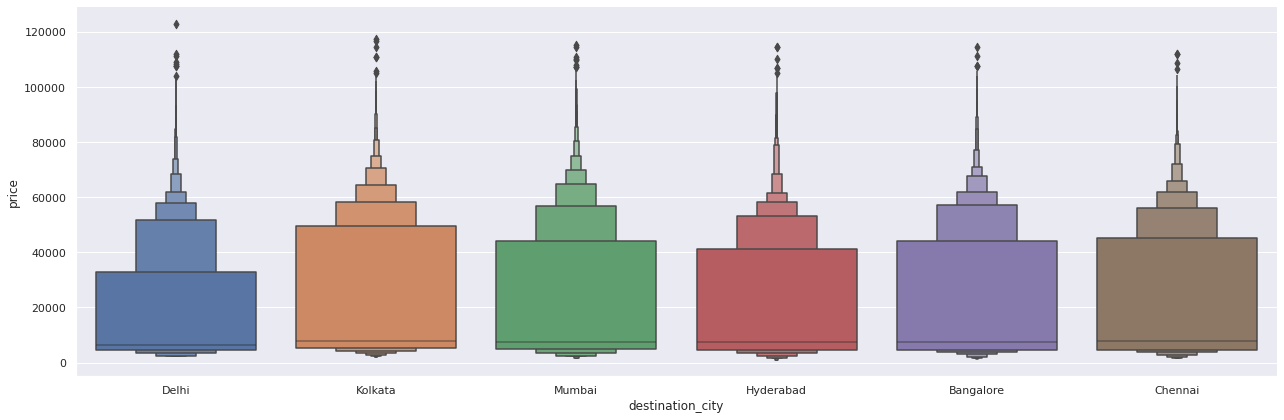

In [11]:
sns.catplot(y = "price", x = "destination_city", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [12]:
df['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

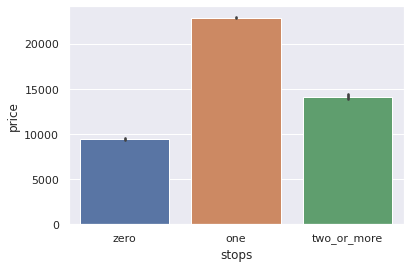

In [13]:
#sns.catplot(y = "price", x = "stops", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
sns.barplot(y = "price", x = "stops", data = df)
plt.show()

In [14]:
df1.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,Du_hour,Du_min
0,4,2,2,2,5,5,1,1,5953,2,17
1,4,2,1,2,4,5,1,1,5953,2,33
2,0,2,1,2,1,5,1,1,5956,2,17
3,5,2,4,2,0,5,1,1,5955,2,25
4,5,2,4,2,4,5,1,1,5955,2,33


In [15]:
df1['source_city'].unique()

array([2, 5, 0, 4, 3, 1])

In [16]:
y=df1['price']


In [17]:
X=df1.drop('price',axis=1)

In [18]:
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [19]:
X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,Du_hour,Du_min
0,4,2,2,2,5,5,1,1,2,17
1,4,2,1,2,4,5,1,1,2,33
2,0,2,1,2,1,5,1,1,2,17
3,5,2,4,2,0,5,1,1,2,25
4,5,2,4,2,4,5,1,1,2,33


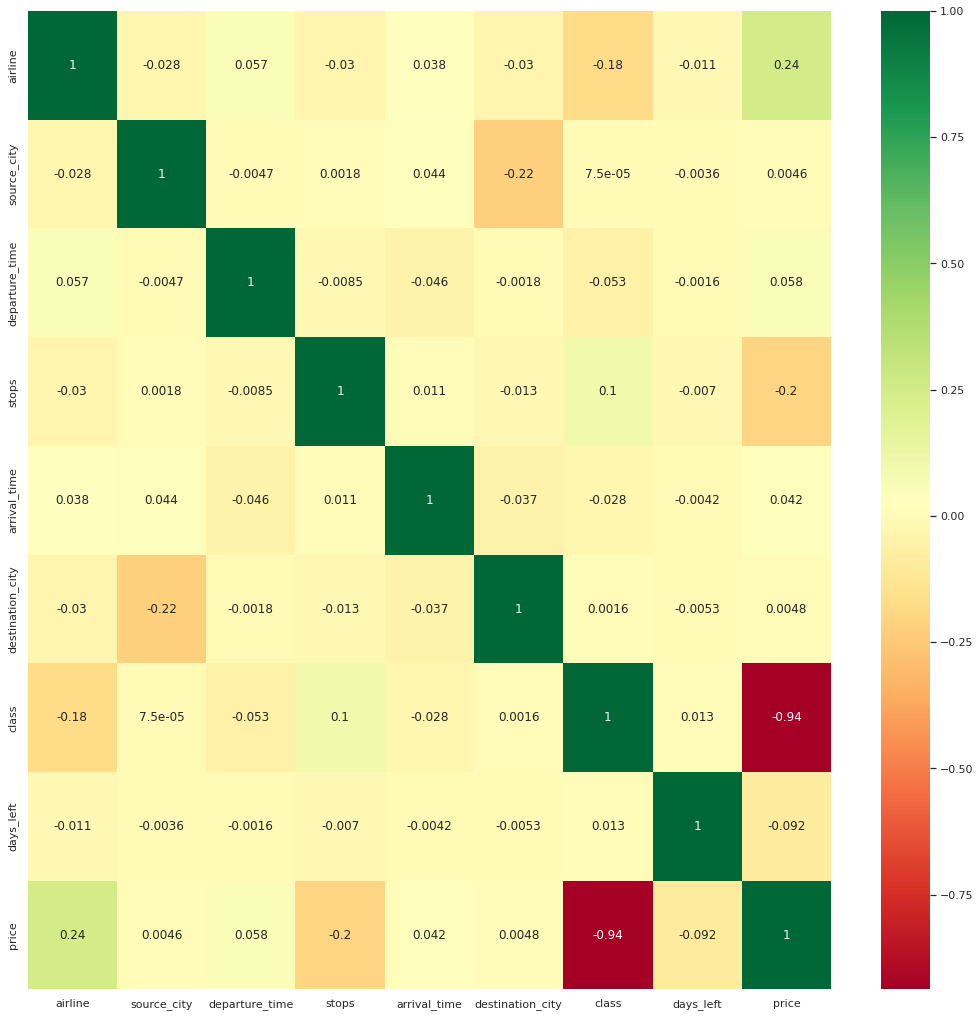

In [20]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df1.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [21]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [22]:
print(selection.feature_importances_)

[0.01111708 0.01044512 0.00549438 0.03861236 0.00555042 0.01040622
 0.88295464 0.01867045 0.00569946 0.01104986]


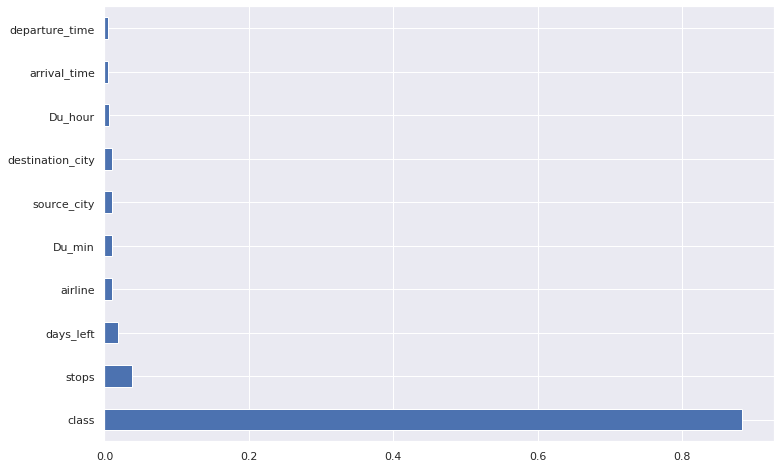

In [23]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators= 700, min_samples_split= 15, min_samples_leaf= 1, max_features= 'auto', max_depth=20, bootstrap= True  
)

regr.fit(X_train, y_train)

#regr.predict(X_test)
#regr.score

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [26]:
y_pred=regr.predict(X_test)

In [27]:

regr.score(X_train, y_train)



0.9884801700481585

In [28]:
regr.score(X_test, y_test)


0.9826014295208063

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


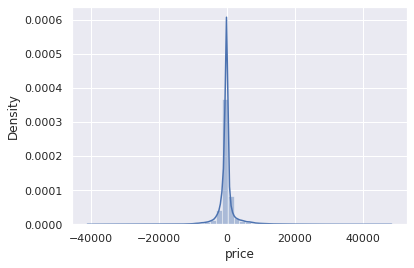

In [29]:

sns.distplot(y_test-y_pred)
plt.show()

In [30]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)



1380.4069807888084

In [31]:
import pickle
with open( "flight_rf.pkl", "wb" ) as f:
    pickle.dump( regr, f)

In [32]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [33]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [34]:

rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [35]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.4min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.4min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.4min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.4min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.4min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.2min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.3min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=20,
                                                   min_samples_split=15,
                                                   n_estimators=700),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
    

In [36]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [37]:
prediction = rf_random.predict(X_test)

In [38]:
#import pickle
#file = open('flight_rf.pkl', 'wb')

# dump information to that file
#pickle.dump(rf_random, file)

In [39]:
#test = open('flight_price_rf.pkl','rb')
#randforest = pickle.load(test)

In [40]:
#y_prediction = randforest.predict(X_test)